In [2]:
import pandas as pd 
data = pd.read_csv("Data/bch.csv")
data.head()

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,2017-08-01,308149,89,68606659,7.708613e+05,25.851468,5.411500e+09,2.093305e+08,8.602220e+11,0.000676,...,2.556305e+08,7.186771,2359.617548,0.013590,4.461976,1.494360e+06,4.906400e+08,NaN,NaN,NaN
1,2017-08-02,16751,7,4320573,6.172247e+05,24.743938,5.653824e+09,2.284933e+08,7.314358e+11,0.001152,...,3.304812e+07,23.399380,8026.652990,0.985277,337.978213,1.504112e+05,5.159533e+07,NaN,NaN,NaN
2,2017-08-03,80506,35,17829726,5.094207e+05,16.215795,4.994964e+09,3.080308e+08,2.307405e+11,0.000894,...,1.584445e+08,27.968099,8475.623036,0.974834,295.419585,1.050090e+06,3.182257e+08,NaN,NaN,NaN
3,2017-08-04,88105,19,21606631,1.137191e+06,8.802462,3.230499e+09,3.669995e+08,2.255056e+11,0.000807,...,1.751326e+08,32.142174,6299.628688,0.957377,187.638918,1.334061e+06,2.614661e+08,NaN,NaN,NaN
4,2017-08-05,44381,13,9964347,7.664882e+05,8.208400,3.188358e+09,3.884262e+08,2.255056e+11,0.000762,...,1.173970e+08,45.578095,8816.353395,0.999840,193.403115,8.936041e+05,1.728534e+08,NaN,NaN,NaN


/Users/karthikvenkatesh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


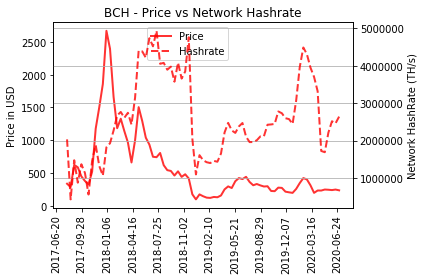

In [4]:
# create line plots to look at trends

bch_df = data[['date', 'PriceUSD', 'HashRate']]
bch_df['date'] =  pd.to_datetime(bch_df['date'])

bch_df = bch_df.resample('2W-Wed', label='right', closed = 'right', on='date').mean().reset_index().sort_values(by='date')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots()

line_weight = 2
alpha = 0.8
tick_spacing = 100

lns1 = ax1.plot(bch_df['date'], bch_df['PriceUSD'], color='r', lw=line_weight, alpha=alpha, label='Price')

plt.xticks(rotation=90)
ax2 = ax1.twinx()
lns2 = ax2.plot(bch_df['date'], bch_df['HashRate'],'--', color='r', lw=line_weight, alpha=alpha, label='Hashrate')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

ax1.set_ylabel(r"Price in USD")
ax2.set_ylabel(r"Network HashRate (TH/s)")
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, bbox_to_anchor = (0,0,0.6,1))

plt.title("BCH - Price vs Network Hashrate")

fig.tight_layout()
plt.grid()
plt.show()

In [5]:
ap17_df = data[(data['date']>= '2017-03-01') & (data['date'] <= '2019-03-31')][['date','PriceUSD','HashRate']]
ap17_df

,date,PriceUSD,HashRate
0,2017-08-01,328.327901,3.805806e+06
1,2017-08-02,343.028449,2.545191e+05
2,2017-08-03,303.046086,4.014561e+05
3,2017-08-04,195.992613,2.129890e+05
4,2017-08-05,193.434003,1.457293e+05
...,...,...,...
603,2019-03-27,171.121379,2.063802e+06
604,2019-03-28,167.308596,1.841767e+06
605,2019-03-29,169.913081,1.779152e+06
606,2019-03-30,166.492482,1.814641e+06


In [6]:
# create two week average of price and hashrate

df_2w = ap17_df[['date', 'HashRate', 'PriceUSD']]
df_2w['date'] =  pd.to_datetime(df_2w['date'])

df_2w = df_2w.resample('2W-Wed', label='right', closed = 'right', on='date').mean().reset_index().sort_values(by='date')
df_2w

,date,HashRate,PriceUSD
0,2017-08-02,2.030163e+06,335.678175
1,2017-08-16,4.246240e+05,285.040584
2,2017-08-30,1.471412e+06,623.624222
3,2017-09-13,8.708538e+05,586.337152
4,2017-09-27,1.364928e+06,447.311001
5,2017-10-11,1.130416e+06,377.418641
6,2017-10-25,5.545805e+05,326.453425
7,2017-11-08,1.454525e+06,518.783101
8,2017-11-22,1.879091e+06,1175.718962
9,2017-12-06,1.316879e+06,1503.555550


In [7]:
# define growth rate for price and hashrate for two week periods
tmp = df_2w

for i in range(1, tmp.shape[0]):
    tmp.loc[tmp.index[i], '%change_price'] = ((tmp['PriceUSD'].iloc[i] - tmp['PriceUSD'].iloc[i-1])/(tmp['PriceUSD'].iloc[i-1]))*100
    tmp.loc[tmp.index[i], '%change_hashrate'] = ((tmp['HashRate'].iloc[i] - tmp['HashRate'].iloc[i-1])/(tmp['HashRate'].iloc[i-1]))*100
tmp

,date,HashRate,PriceUSD,%change_price,%change_hashrate
0,2017-08-02,2.030163e+06,335.678175,NaN,NaN
1,2017-08-16,4.246240e+05,285.040584,-15.085160,-79.084236
2,2017-08-30,1.471412e+06,623.624222,118.784361,246.521229
3,2017-09-13,8.708538e+05,586.337152,-5.979093,-40.815109
4,2017-09-27,1.364928e+06,447.311001,-23.710957,56.734412
5,2017-10-11,1.130416e+06,377.418641,-15.625004,-17.181280
6,2017-10-25,5.545805e+05,326.453425,-13.503630,-50.940118
7,2017-11-08,1.454525e+06,518.783101,58.914890,162.274854
8,2017-11-22,1.879091e+06,1175.718962,126.630158,29.189321
9,2017-12-06,1.316879e+06,1503.555550,27.883925,-29.919367


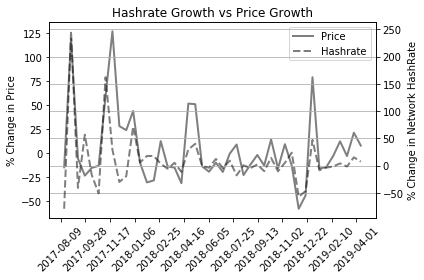

In [8]:
# plot growth rates for both

fig, ax1 = plt.subplots()

line_weight = 2
alpha = 0.5
tick_spacing = 50

lns1 = ax1.plot(tmp['date'], tmp['%change_price'], color='black', lw=line_weight, alpha=alpha, label='Price')

plt.xticks(rotation=45)
ax2 = ax1.twinx()
lns2 = ax2.plot(tmp['date'], tmp['%change_hashrate'],'--', color='black', lw=line_weight, alpha=alpha, label='Hashrate')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

ax1.set_ylabel(r"% Change in Price")
ax2.set_ylabel(r"% Change in Network HashRate")
#ax1.set_ylim(-40,80)
#ax2.set_ylim(-40,80)
leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, bbox_to_anchor = (0,0,1,1))

plt.title("Hashrate Growth vs Price Growth")

fig.tight_layout()
plt.grid()
plt.show()

In [9]:
# Compute (Hashrate change - price change)
# if this value is +ve, hashrate is growing faster than rate of price growth. if it's negative, price change is greater

tmp2 = tmp
for i in range(1, tmp2.shape[0]):
    tmp2.loc[tmp2.index[i], 'hashgrowth-pricegrowth'] = (tmp2['%change_hashrate'].iloc[i] - tmp['%change_price'].iloc[i])
tmp2

,date,HashRate,PriceUSD,%change_price,%change_hashrate,hashgrowth-pricegrowth
0,2017-08-02,2.030163e+06,335.678175,NaN,NaN,NaN
1,2017-08-16,4.246240e+05,285.040584,-15.085160,-79.084236,-63.999076
2,2017-08-30,1.471412e+06,623.624222,118.784361,246.521229,127.736868
3,2017-09-13,8.708538e+05,586.337152,-5.979093,-40.815109,-34.836016
4,2017-09-27,1.364928e+06,447.311001,-23.710957,56.734412,80.445370
5,2017-10-11,1.130416e+06,377.418641,-15.625004,-17.181280,-1.556276
6,2017-10-25,5.545805e+05,326.453425,-13.503630,-50.940118,-37.436489
7,2017-11-08,1.454525e+06,518.783101,58.914890,162.274854,103.359964
8,2017-11-22,1.879091e+06,1175.718962,126.630158,29.189321,-97.440837
9,2017-12-06,1.316879e+06,1503.555550,27.883925,-29.919367,-57.803291


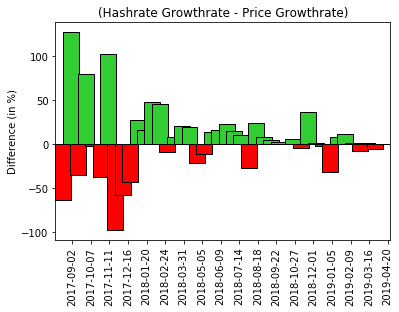

In [10]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()

colors = []
diff_list = tmp2['hashgrowth-pricegrowth'].tolist()

diff_dict = {}
num = list(range(0,len(diff_list)))

alpha = 1

for i in num:
    diff_dict[i] = diff_list[i]

for value in diff_dict.keys():
    if diff_dict[value] < 0:
        colors.append('r')
    else:
        colors.append('limegreen')

ax.bar(tmp2['date'], tmp2['hashgrowth-pricegrowth'], width=30, edgecolor='black', color=colors, alpha=alpha)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=35))
ax.autoscale(enable=True, axis='x', tight=True)
#ax.set_facecolor('beige')
plt.xticks(rotation=90)

plt.title('(Hashrate Growthrate - Price Growthrate)')
plt.ylabel('Difference (in %)')
plt.show()